#**Movi Genre Classification**

#Introduction

Dive into 'Movie Genre Classification with Machine Learning,' a project leveraging Python's ML capabilities to categorize movies accurately. Explore data preprocessing, feature engineering, and model training for an enhanced user experience, making content discovery a breeze through effective genre classification.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Importing Data set

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
test_set= pd.read_csv('/content/drive/MyDrive/codsoft/Task: 1/Genre Classification Dataset/test_data.txt', encoding='ISO-8859-1', na_values=[' '], sep='\t')
test_data_solution= pd.read_csv('/content/drive/MyDrive/codsoft/Task: 1/Genre Classification Dataset/test_data_solution.txt', encoding='ISO-8859-1', na_values=[' '], sep='\t')
train_set= pd.read_csv('/content/drive/MyDrive/codsoft/Task: 1/Genre Classification Dataset/train_data.txt', encoding='ISO-8859-1', na_values=[' '], sep='\t')

## Organising data

In [ ]:
test_set[['ID', 'TITLE', 'DESCRIPTION']] = test_set.iloc[:, 0].str.split(':::', expand=True)
train_set[['ID', 'TITLE', 'GENRE','DESCRIPTION']] = train_set.iloc[:, 0].str.split(':::', expand=True)
test_data_solution[['ID', 'TITLE', 'GENRE','DESCRIPTION']] = test_data_solution.iloc[:, 0].str.split(':::', expand=True)

## Visualization Data

<ipython-input-5-0e8322c6ef48>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_set, y='GENRE', order=train_set['GENRE'].value_counts().index, palette='magma')
<ipython-input-5-0e8322c6ef48>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts, palette='inferno')


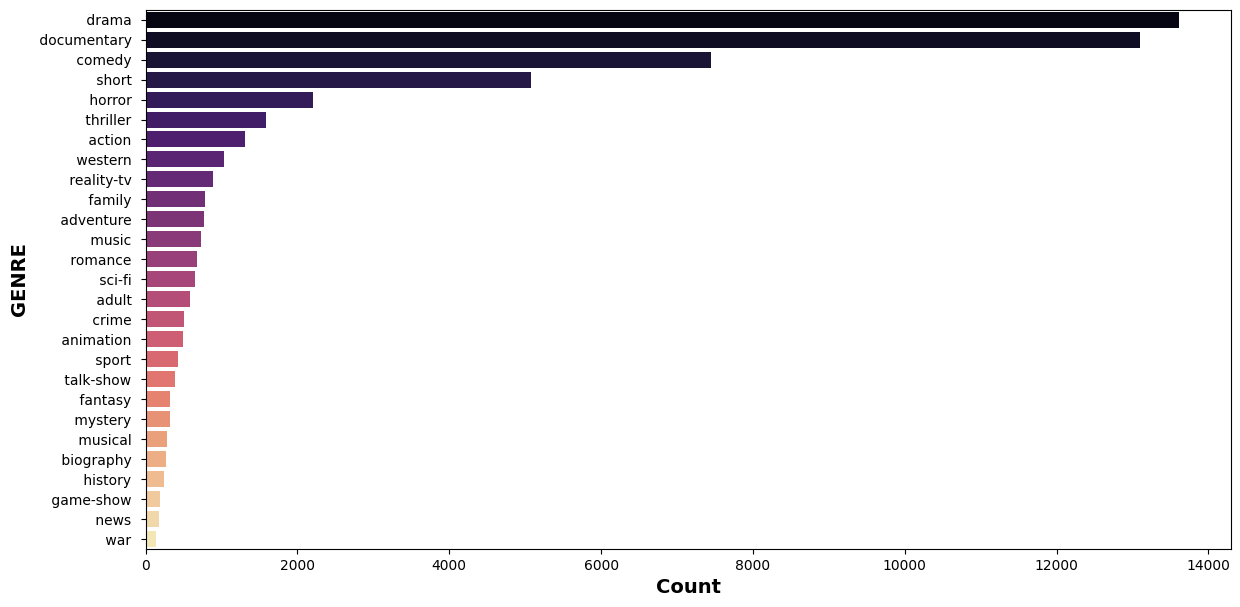

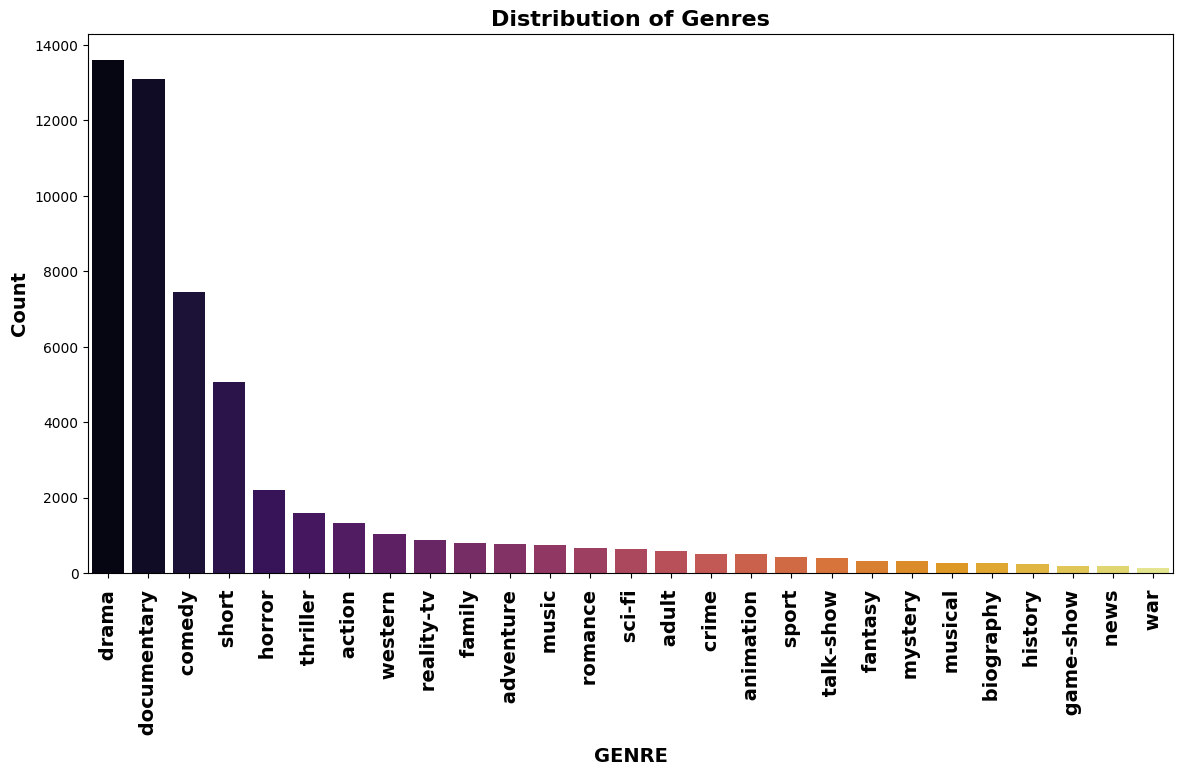

In [ ]:
plt.figure(figsize=(14, 7))
sns.countplot(data=train_set, y='GENRE', order=train_set['GENRE'].value_counts().index, palette='magma')
plt.xlabel('Count', fontsize=14, fontweight='bold')
plt.ylabel('GENRE', fontsize=14, fontweight='bold')

plt.figure(figsize=(14, 7))
counts = train_set['GENRE'].value_counts()
sns.barplot(x=counts.index, y=counts, palette='inferno')
plt.xlabel('GENRE', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.title('Distribution of Genres', fontsize=16, fontweight='bold')
plt.xticks(rotation=90, fontsize=14, fontweight='bold')
plt.show()

In [ ]:
test_set = test_set.drop(test_set.columns[0], axis=1)
test_set.head()

,ID,TITLE,DESCRIPTION
0,2,La guerra de papÃ¡ (1977),"Spain, March 1964: Quico is a very naughty ch..."
1,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
2,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
3,5,Er nu zhai (1955),Before he was known internationally as a mart...
4,6,Riddle Room (2016),Emily Burns is being held captive in a room w...


In [ ]:
train_set = train_set.drop(train_set.columns[0], axis=1)
train_set.head()

,ID,TITLE,GENRE,DESCRIPTION
0,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
1,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
2,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
3,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
4,6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...


In [ ]:
test_data_solution = test_data_solution.drop(test_data_solution.columns[0], axis=1)
test_data_solution.head()

,ID,TITLE,GENRE,DESCRIPTION
0,2,La guerra de papÃ¡ (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
1,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
2,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
3,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...
4,6,Riddle Room (2016),horror,Emily Burns is being held captive in a room w...


## Preprocessing and Cleaning Data

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
import re
import nltk
import string
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
la_stem = LancasterStemmer()
stop_words = set(stopwords.words('english'))

def clean_data(text):
    text = text.lower()
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'pic.\S+', '', text)
    text = re.sub(r"[^a-zA-Z+']", ' ', text)
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text + ' ')
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words('english')
    text = " ".join([i for i in words if i not in stopwords and len(i) > 2])
    text = re.sub("\s[\s]+", " ", text).strip()
    return text

In [ ]:
train_set['Clean_Text'] = train_set['DESCRIPTION'].apply(clean_data)
test_set['Clean_Text'] = test_set['DESCRIPTION'].apply(clean_data)

##Feature Extraction

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf= TfidfVectorizer()
X_train = tf.fit_transform(train_set['Clean_Text'])
X_test = tf.transform(test_set['Clean_Text'])

##Spliting Data into Features and Target

In [ ]:
X = X_train
y = train_set['GENRE']

## Spliting the Data into Training set and Cross-Validation set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_cross_val, y_train, y_cross_val= train_test_split(X, y, test_size= 0.40, random_state= 0)

## Traning the model using Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model_mnb= MultinomialNB()
model_mnb.fit(X_train, y_train)

MultinomialNB()

##Predicting the Model on Cross Validation Set

In [ ]:
pred_mnb= model_mnb.predict(X_cross_val)
con_array = np.concatenate((pred_mnb.reshape(len(pred_mnb), 1), y_cross_val.to_numpy().reshape(len(y_cross_val), 1)), 1)
print(con_array[:100, :])

[[' documentary ' ' documentary ']
 [' documentary ' ' comedy ']
 [' drama ' ' horror ']
 [' drama ' ' romance ']
 [' documentary ' ' adventure ']
 [' documentary ' ' drama ']
 [' documentary ' ' documentary ']
 [' drama ' ' adventure ']
 [' drama ' ' drama ']
 [' documentary ' ' documentary ']
 [' documentary ' ' short ']
 [' drama ' ' short ']
 [' drama ' ' documentary ']
 [' documentary ' ' documentary ']
 [' drama ' ' drama ']
 [' documentary ' ' history ']
 [' drama ' ' drama ']
 [' documentary ' ' documentary ']
 [' drama ' ' short ']
 [' documentary ' ' music ']
 [' drama ' ' reality-tv ']
 [' drama ' ' drama ']
 [' drama ' ' drama ']
 [' documentary ' ' documentary ']
 [' drama ' ' documentary ']
 [' drama ' ' drama ']
 [' documentary ' ' short ']
 [' drama ' ' short ']
 [' drama ' ' family ']
 [' documentary ' ' comedy ']
 [' drama ' ' documentary ']
 [' drama ' ' drama ']
 [' documentary ' ' documentary ']
 [' drama ' ' drama ']
 [' documentary ' ' comedy ']
 [' drama ' ' com

##Classification Report and Accuracy Score for Cross Validation Set

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
acc = accuracy_score(y_cross_val, pred_mnb)
print("Validation Accuracy:", acc)
print(classification_report(y_cross_val, pred_mnb))

Validation Accuracy: 0.44125242091672046


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      action        0.00      0.00      0.00       495
       adult        0.00      0.00      0.00       231
   adventure        0.00      0.00      0.00       342
   animation        0.00      0.00      0.00       212
   biography        0.00      0.00      0.00       111
      comedy        0.65      0.02      0.05      2939
       crime        0.00      0.00      0.00       202
 documentary        0.54      0.89      0.67      5269
       drama        0.37      0.88      0.53      5415
      family        0.00      0.00      0.00       317
     fantasy        0.00      0.00      0.00       134
   game-show        0.00      0.00      0.00        78
     history        0.00      0.00      0.00       101
      horror        0.00      0.00      0.00       864
       music        0.00      0.00      0.00       287
     musical        0.00      0.00      0.00       115
     mystery        0.00      0.00      0.00       121
        n

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Predicting the Model on Test set

In [ ]:
y_test_set=test_data_solution['GENRE']

In [ ]:
test_pred= model_mnb.predict(X_test)
con_array = np.concatenate((test_pred.reshape(len(test_pred), 1), y_test_set.to_numpy().reshape(len(y_test_set), 1)), 1)
print(con_array[:100, :])

[[' drama ' ' comedy ']
 [' documentary ' ' documentary ']
 [' drama ' ' drama ']
 [' drama ' ' drama ']
 [' drama ' ' horror ']
 [' drama ' ' drama ']
 [' drama ' ' comedy ']
 [' documentary ' ' documentary ']
 [' drama ' ' drama ']
 [' drama ' ' drama ']
 [' drama ' ' drama ']
 [' drama ' ' drama ']
 [' documentary ' ' drama ']
 [' drama ' ' short ']
 [' documentary ' ' documentary ']
 [' drama ' ' comedy ']
 [' drama ' ' western ']
 [' documentary ' ' documentary ']
 [' drama ' ' documentary ']
 [' drama ' ' short ']
 [' documentary ' ' drama ']
 [' documentary ' ' documentary ']
 [' documentary ' ' documentary ']
 [' documentary ' ' documentary ']
 [' drama ' ' documentary ']
 [' drama ' ' drama ']
 [' drama ' ' family ']
 [' drama ' ' sport ']
 [' drama ' ' horror ']
 [' drama ' ' western ']
 [' drama ' ' drama ']
 [' documentary ' ' documentary ']
 [' drama ' ' comedy ']
 [' drama ' ' drama ']
 [' drama ' ' documentary ']
 [' drama ' ' drama ']
 [' drama ' ' romance ']
 [' docume

##Classification Report and Accuracy Score for Test Set

In [ ]:
acc = accuracy_score(y_test_set, test_pred)
print("Validation Accuracy:", acc)
print(classification_report(y_test_set, test_pred))

Validation Accuracy: 0.4399712171811288


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      action        0.00      0.00      0.00      1314
       adult        0.00      0.00      0.00       590
   adventure        0.00      0.00      0.00       775
   animation        0.00      0.00      0.00       498
   biography        0.00      0.00      0.00       264
      comedy        0.73      0.02      0.04      7446
       crime        0.00      0.00      0.00       505
 documentary        0.53      0.89      0.67     13096
       drama        0.37      0.89      0.53     13612
      family        0.00      0.00      0.00       783
     fantasy        0.00      0.00      0.00       322
   game-show        0.00      0.00      0.00       193
     history        0.00      0.00      0.00       243
      horror        0.00      0.00      0.00      2204
       music        0.00      0.00      0.00       731
     musical        0.00      0.00      0.00       276
     mystery        0.00      0.00      0.00       318
        n

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Traning the model using LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
model_lr= LogisticRegression()
model_lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

##Predicting the Model on Cross Validation Set

In [ ]:
pred_lr= model_lr.predict(X_cross_val)
con_array = np.concatenate((pred_lr.reshape(len(pred_lr), 1), y_cross_val.to_numpy().reshape(len(y_cross_val), 1)), 1)
print(con_array[:100, :])

[[' documentary ' ' documentary ']
 [' comedy ' ' comedy ']
 [' drama ' ' horror ']
 [' drama ' ' romance ']
 [' horror ' ' adventure ']
 [' documentary ' ' drama ']
 [' documentary ' ' documentary ']
 [' action ' ' adventure ']
 [' drama ' ' drama ']
 [' documentary ' ' documentary ']
 [' short ' ' short ']
 [' drama ' ' short ']
 [' drama ' ' documentary ']
 [' documentary ' ' documentary ']
 [' drama ' ' drama ']
 [' documentary ' ' history ']
 [' drama ' ' drama ']
 [' documentary ' ' documentary ']
 [' short ' ' short ']
 [' documentary ' ' music ']
 [' comedy ' ' reality-tv ']
 [' drama ' ' drama ']
 [' drama ' ' drama ']
 [' documentary ' ' documentary ']
 [' drama ' ' documentary ']
 [' drama ' ' drama ']
 [' documentary ' ' short ']
 [' drama ' ' short ']
 [' drama ' ' family ']
 [' comedy ' ' comedy ']
 [' drama ' ' documentary ']
 [' drama ' ' drama ']
 [' documentary ' ' documentary ']
 [' drama ' ' drama ']
 [' documentary ' ' comedy ']
 [' drama ' ' comedy ']
 [' short ' 

##Classification Report and Accuracy Score for Cross Validation Set

In [ ]:
acc = accuracy_score(y_cross_val, pred_lr)
print("Validation Accuracy:", acc)
print(classification_report(y_cross_val, pred_lr))

Validation Accuracy: 0.5696301761505118


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      action        0.51      0.17      0.25       495
       adult        0.68      0.16      0.26       231
   adventure        0.63      0.09      0.16       342
   animation        1.00      0.00      0.01       212
   biography        0.00      0.00      0.00       111
      comedy        0.51      0.58      0.54      2939
       crime        0.00      0.00      0.00       202
 documentary        0.64      0.88      0.74      5269
       drama        0.52      0.80      0.63      5415
      family        0.82      0.03      0.05       317
     fantasy        0.00      0.00      0.00       134
   game-show        0.93      0.32      0.48        78
     history        0.00      0.00      0.00       101
      horror        0.70      0.52      0.60       864
       music        0.69      0.29      0.41       287
     musical        0.00      0.00      0.00       115
     mystery        0.00      0.00      0.00       121
        n

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Predicting the Model on Test set

In [ ]:
test_pred_lr= model_lr.predict(X_test)
con_array = np.concatenate((test_pred_lr.reshape(len(test_pred_lr), 1), y_test_set.to_numpy().reshape(len(y_test_set), 1)), 1)
print(con_array[:100, :])

[[' drama ' ' comedy ']
 [' documentary ' ' documentary ']
 [' drama ' ' drama ']
 [' drama ' ' drama ']
 [' drama ' ' horror ']
 [' drama ' ' drama ']
 [' comedy ' ' comedy ']
 [' documentary ' ' documentary ']
 [' documentary ' ' drama ']
 [' drama ' ' drama ']
 [' drama ' ' drama ']
 [' drama ' ' drama ']
 [' documentary ' ' drama ']
 [' drama ' ' short ']
 [' comedy ' ' documentary ']
 [' comedy ' ' comedy ']
 [' western ' ' western ']
 [' documentary ' ' documentary ']
 [' drama ' ' documentary ']
 [' drama ' ' short ']
 [' documentary ' ' drama ']
 [' documentary ' ' documentary ']
 [' documentary ' ' documentary ']
 [' documentary ' ' documentary ']
 [' documentary ' ' documentary ']
 [' comedy ' ' drama ']
 [' drama ' ' family ']
 [' comedy ' ' sport ']
 [' drama ' ' horror ']
 [' drama ' ' western ']
 [' drama ' ' drama ']
 [' documentary ' ' documentary ']
 [' comedy ' ' comedy ']
 [' drama ' ' drama ']
 [' drama ' ' documentary ']
 [' drama ' ' drama ']
 [' drama ' ' romance

##Accuracy Score for Test Set

In [ ]:
acc = accuracy_score(y_test_set, test_pred_lr)
print("Validation Accuracy:", acc)

Validation Accuracy: 0.5691802431779184


# Summary

The Colab notebook "Movie Genre Classification" delves into machine learning techniques for accurately categorizing movies based on their genre. The project encompasses key steps in the data science pipeline, including data importing, organization, visualization, and model training. Utilizing Python's pandas, numpy, and scikit-learn libraries, the notebook employs a Multinomial Naive Bayes classifier and logistic regression model for genre classification. The dataset, comprising movie descriptions, undergoes preprocessing, including text cleaning and feature extraction using TF-IDF. Visualization components showcase the distribution of genres in the training set. The notebook concludes with comprehensive evaluation metrics, including accuracy and classification reports, demonstrating the effectiveness of the machine learning models for genre prediction. The code is structured and well-documented, offering insights into the entire workflow for movie genre classification.
